# Reuters Newswire

A model to classify Reuters Newswire into 46 mutually exclusive toopics, each datapoints should be classified into 1 category

In [ ]:
import tensorflow as tf
import keras
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import reuters

Input the data from keras database

In [ ]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

print(len(train_data))
print(len(test_data))
print(train_data[0])

8982
2246
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


The same with IMDB dataset, the indices are offset by 3, since 0,1,2 are reserved for "padding", "start of sequence" and "unknown"

In [ ]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3,"?") for i in train_data[0]])

print(train_labels[1])

4


We then vectorize the data, we can cast the label list as an integer tensor or a one-hot encoding
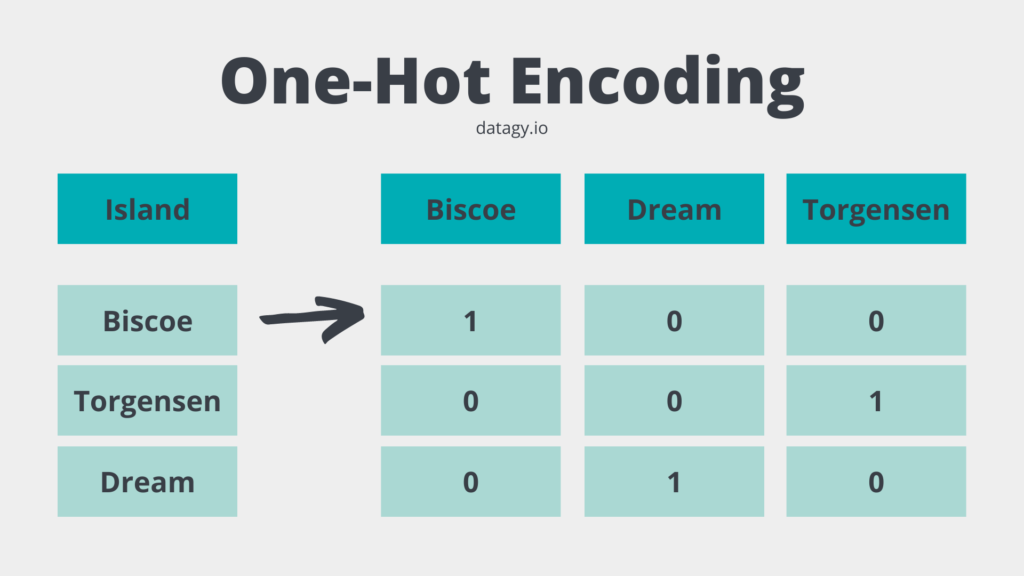

In [ ]:
def vectorize_sequences(sequences, dimension = 10000) :
    results = np.zeros((len(sequences), dimension))
    for i , sequence in enumerate(sequences) :
      for j in sequence :
        results[i,j] = 1.
      return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

def to_one_hot(labels, dimension = 46) :
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1.
  return results

y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

from keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical

keras.to_categorical : Converts a class vector (integers) to binary class matrix.


In [ ]:
#Just an example
a = tf.keras.utils.to_categorical([0, 1, 2, 3], num_classes=4)
print(a)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


We then model the neural network

In [ ]:
model_Reuters = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

In [ ]:
model_Reuters.compile(
    optimizer = "adam",
    loss = "categorical_crossentropy",
    metrics = ["accuracy"]
)

In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]

print(y_val)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
history = model_Reuters.fit(
    partial_x_train,
    partial_y_train,
    epochs =25,
    batch_size = 256,
    validation_data=(x_val, y_val)
)


Epoch 1/25
32/32 [==============================] - 1s 21ms/step - loss: 3.8097 - accuracy: 0.2638 - val_loss: 3.7887 - val_accuracy: 0.3530
Epoch 2/25
32/32 [==============================] - 1s 17ms/step - loss: 3.7701 - accuracy: 0.3514 - val_loss: 3.7496 - val_accuracy: 0.3530
Epoch 3/25
32/32 [==============================] - 1s 16ms/step - loss: 3.7312 - accuracy: 0.3514 - val_loss: 3.7113 - val_accuracy: 0.3530
Epoch 4/25
32/32 [==============================] - 1s 17ms/step - loss: 3.6932 - accuracy: 0.3514 - val_loss: 3.6736 - val_accuracy: 0.3530
Epoch 5/25
32/32 [==============================] - 1s 16ms/step - loss: 3.6558 - accuracy: 0.3514 - val_loss: 3.6368 - val_accuracy: 0.3530
Epoch 6/25
32/32 [==============================] - 1s 25ms/step - loss: 3.6193 - accuracy: 0.3514 - val_loss: 3.6007 - val_accuracy: 0.3530
Epoch 7/25
32/32 [==============================] - 1s 24ms/step - loss: 3.5835 - accuracy: 0.3514 - val_loss: 3.5652 - val_accuracy: 0.3530
Epoch 8/25
32

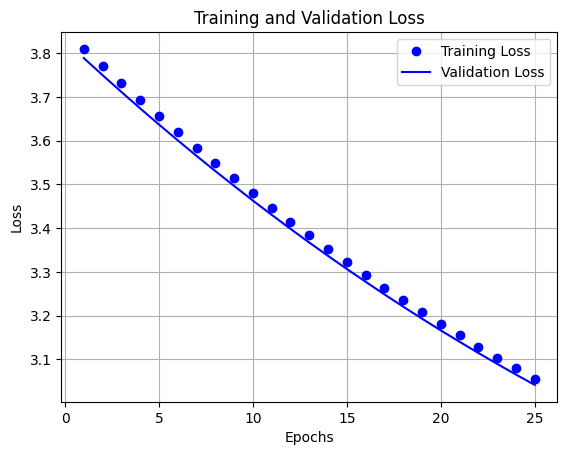

In [ ]:
History_dict = history.history
loss_values = History_dict["loss"]
val_loss_values = History_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(
    epochs,
    loss_values, "bo",
    label = "Training Loss"
)
plt.plot(
    epochs,
    val_loss_values, "b",
    label = "Validation Loss"
)
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

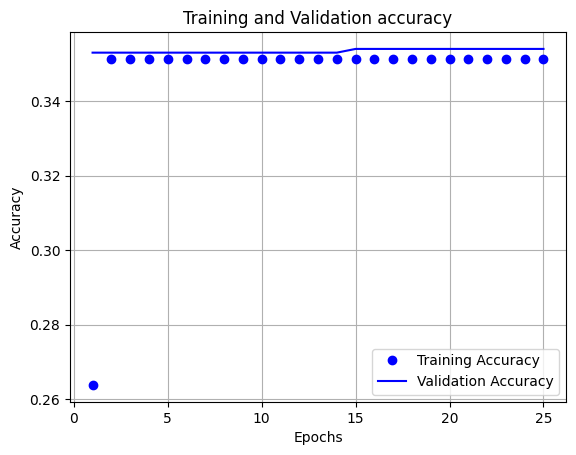

In [ ]:
History_dict = history.history
accuracy = History_dict["accuracy"]
val_accuracy = History_dict["val_accuracy"]
plt.clf()
plt.plot(
    epochs,
    accuracy,
    "bo",
    label = 'Training Accuracy'
)
plt.plot(
    epochs,
    val_accuracy,
    "b",
    label = 'Validation Accuracy'
)
plt.title("Training and Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()